In [1]:
# haandle data
import json
import operator
import collections
# https://docs.python.org/3/library/re.html
import re # regular expression

In [2]:
# handle table data
import numpy as np
import pandas as pd

In [7]:
# algorithms
# https://rare-technologies.com/word2vec-tutorial/
from gensim.models import word2vec

In [217]:
# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pylab import text

## DATA

In [220]:
# load json file
with open('./data/train.json') as data_file:
    train_data = json.load(data_file)

In [119]:
train_data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

## CUISINE

In [120]:
# get all ingredients in all dishes
def get_ingredients(json):
    raw_ingredients = list()
    for dish in json:
        for ingredient in dish['ingredients']:
            raw_ingredients.append(ingredient.strip())
    return raw_ingredients
raw_ingredients = get_ingredients(train_data)
# get all cusines
raw_cuisines = list()
for dish in train_data:
    raw_cuisines.append(dish['cuisine'].strip())

In [121]:
# store it in Counter class
count_ingredient = collections.Counter(raw_ingredients) 
count_cuisine = collections.Counter(raw_cuisines)

In [122]:
print(f'Total number of ingredients used (w/ repetition): {len(raw_ingredients)}')
print(f'Total number of unique ingredients used: {len(count_ingredient.values())}')
print(f'Total number of dishes: {len(raw_cuisines)}')
print(f'Total number of dishes: {len(count_cuisine.values())}')

Total number of ingredients used (w/ repetition): 428275
Total number of unique ingredients used: 6714
Total number of dishes: 39774
Total number of dishes: 20


In [123]:
print("All the cuisines (ordered by most common):")
for cuisines in count_cuisine.most_common():
    print(f'{cuisines}')

All the cuisines (ordered by most common):
('italian', 7838)
('mexican', 6438)
('southern_us', 4320)
('indian', 3003)
('chinese', 2673)
('french', 2646)
('cajun_creole', 1546)
('thai', 1539)
('japanese', 1423)
('greek', 1175)
('spanish', 989)
('korean', 830)
('vietnamese', 825)
('moroccan', 821)
('british', 804)
('filipino', 755)
('irish', 667)
('jamaican', 526)
('russian', 489)
('brazilian', 467)


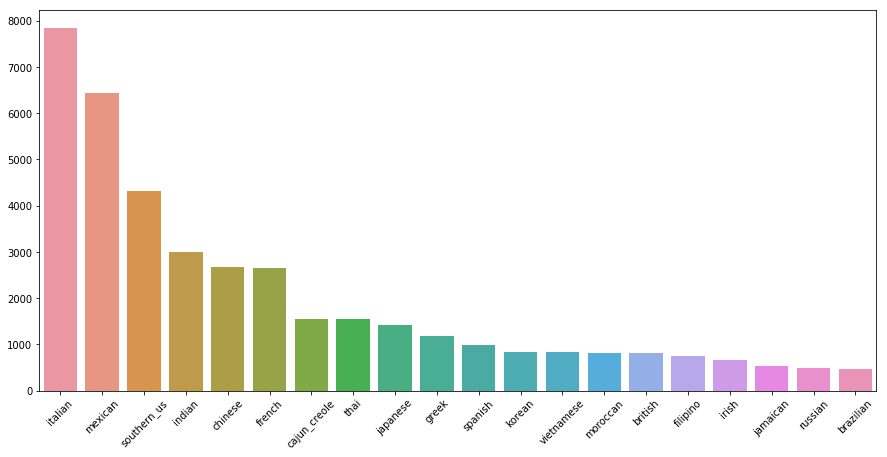

In [124]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
x_cuisine = [cu for cu, frq in count_cuisine.most_common()]
y_frequency = [frq for cu, frq in count_cuisine.most_common()]
sns.barplot(x = x_cuisine, y = y_frequency)

In [125]:
cuisine_ingredients_count = dict()
for cuisine in  set(raw_cuisines):
    cuisine_ingredients_count[cuisine] = []

for dish in train_data:
    cuisine = dish['cuisine']
    len_ingredients = len(dish['ingredients'])
    cuisine_ingredients_count[cuisine].append(len_ingredients)    

In [126]:
cuisine_ingredients_stat_df = pd.DataFrame(columns=['cuisine', 'sum', 'max', 'median', 'mean', 'min'], index=range(len(set(raw_cuisines))))

In [127]:
row_index = 0
for cuisine, ing_count_list in cuisine_ingredients_count.items():
    altogether = np.sum(ing_count_list)
    average = np.mean(ing_count_list)
    most_common = np.median(ing_count_list)
    highest = np.max(ing_count_list)
    lowest = np.min(ing_count_list)
    
    cuisine_ingredients_stat_df.iloc[row_index , :] = [cuisine, altogether, highest, most_common, average, lowest]
    row_index += 1

In [128]:
cuisine_ingredients_stat_df = cuisine_ingredients_stat_df.sort_values(by=['sum'], ascending=False)

In [129]:
cuisine_ingredients_stat_df.head()

,cuisine,sum,max,median,mean,min
1,italian,77667,65,10,9.90903,1
12,mexican,70029,52,10,10.8774,1
8,southern_us,41623,40,9,9.63495,1
3,indian,38156,49,12,12.706,1
5,chinese,32030,38,12,11.9828,2


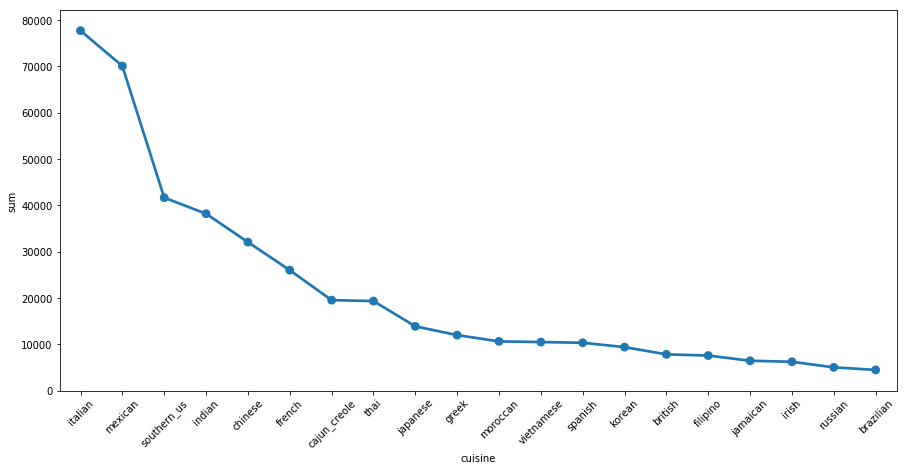

In [130]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)

sns.pointplot(x='cuisine', y='sum', data=cuisine_ingredients_stat_df)


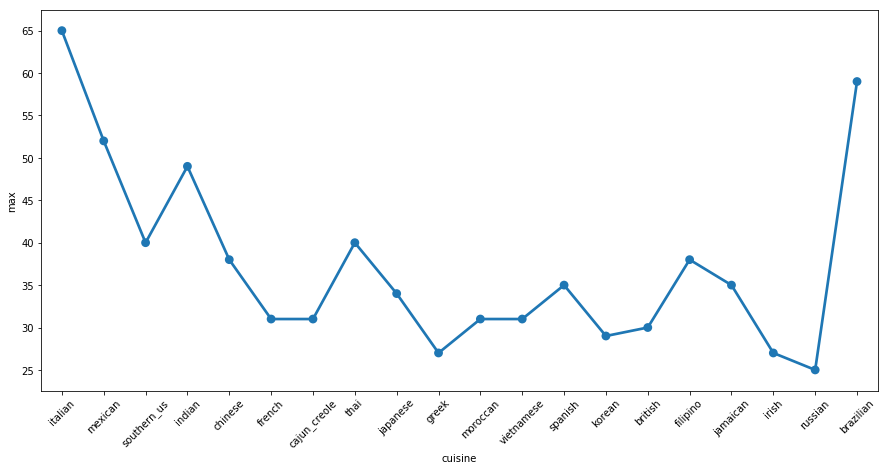

In [131]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.pointplot(x='cuisine', y='max', data=cuisine_ingredients_stat_df)

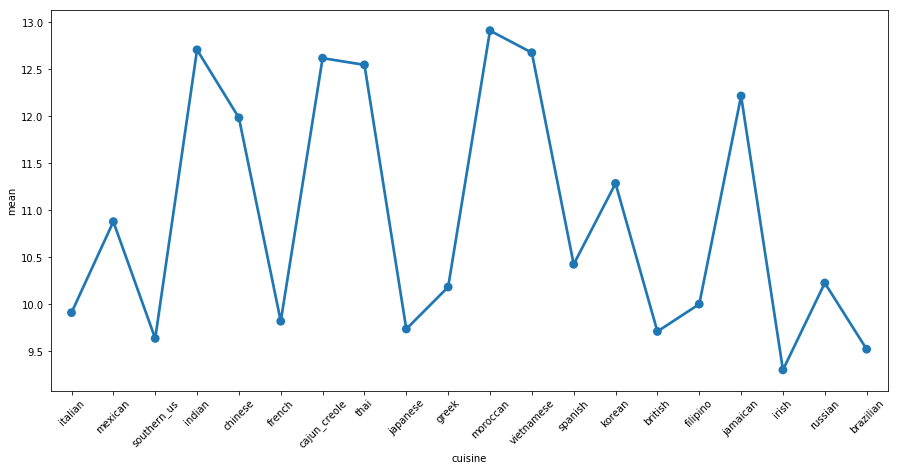

In [132]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.pointplot(x='cuisine', y='mean', data=cuisine_ingredients_stat_df)

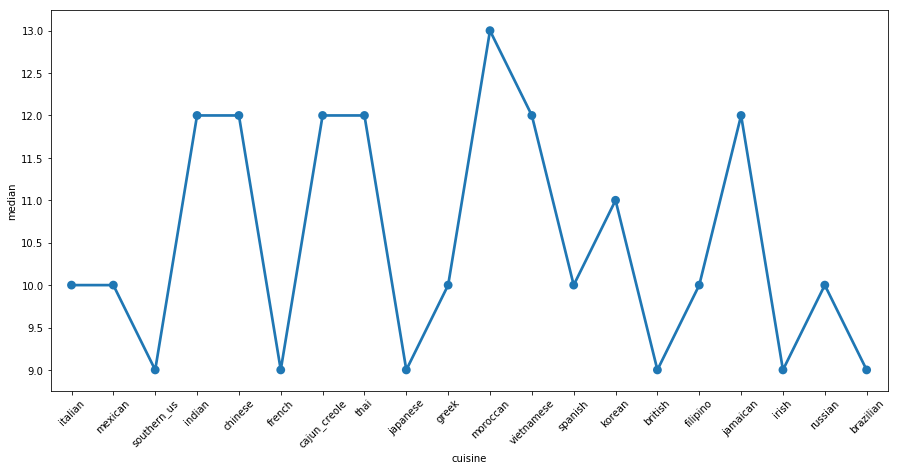

In [133]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.pointplot(x='cuisine', y='median', data=cuisine_ingredients_stat_df)

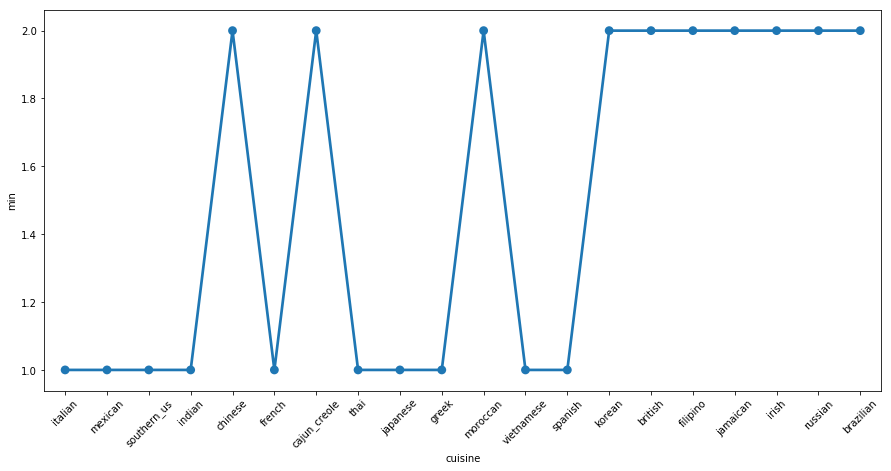

In [134]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.pointplot(x='cuisine', y='min', data=cuisine_ingredients_stat_df)

## INGREDIENTS

In [135]:
count_ingredient.most_common(15)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113)]

In [136]:
count_ingredient.most_common()[-20:]

[('whole wheat peasant bread', 1),
 ('ranch-style seasoning', 1),
 ('ketjap', 1),
 ('chocolate flavored liqueur', 1),
 ('rotini pasta, cook and drain', 1),
 ('game', 1),
 ('tongue', 1),
 ('Daiya', 1),
 ('curry mix', 1),
 ('Kraft Slim Cut Mozzarella Cheese Slices', 1),
 ('Oscar Mayer Cotto Salami', 1),
 ('Challenge Butter', 1),
 ('orange glaze', 1),
 ('cholesterol free egg substitute', 1),
 ('ciabatta loaf', 1),
 ('LiptonÂ® Iced Tea Brew Family Size Tea Bags', 1),
 ('Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix', 1),
 ('lop chong', 1),
 ('tomato garlic pasta sauce', 1),
 ('crushed cheese crackers', 1)]

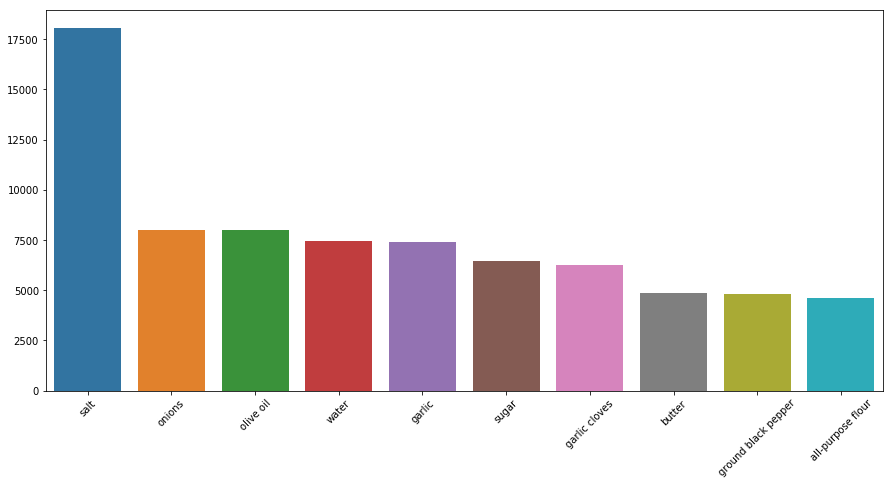

In [137]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
x_ing = [ing for ing, frq in count_ingredient.most_common(10)]
y_ing_frq = [frq for ing, frq in count_ingredient.most_common(10)]
sns.barplot(x = x_ing, y = y_ing_frq)

In [138]:
sentences = list()
# one hot ingredients

reg_expression = r'\(.*oz.\)|crushed|crumbles|ground|Original|@|minced|powder|chopped|sliced'
for dish in train_data:
    clean_dish = list()
    # I want ingredient remove 
    for ingredient in dish['ingredients']:
        # remove this description from the ingredients
        # minimal preprocessing
        ingredient =  re.sub(reg_expression,
                             '', 
                             ingredient)
        clean_dish.append(ingredient.strip())
    sentences.append(clean_dish)

In [139]:
len(sentences)

39774

### Word2Vec model

In [140]:
# Set values for NN parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 3    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled
# initalize model 
model = word2vec.Word2Vec([dish['ingredients'] for dish in train_data], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [156]:
similarity_treshold = 0.9

def replace_similar_ingredients(json, ing1_keep, ing2_repace):
    for dish in json:
        ingredients = dish['ingredients']
        for indx, ingredient in enumerate(ingredients):
            if ingredient == ing2_repace:
                dish['ingredients'][indx] = ing1_keep
    return json 

for ing, freq in count_ingredient.most_common(100):
    similar_ings = model.wv.most_similar(ing)
    for sim_ing, val in similar_ings:
        if not sim_ing == ing: 
            if (val > similarity_treshold):
                train_data = replace_similar_ingredients(train_data, ing, sim_ing)

c:\users\faroo\documents\kaggle_project\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [157]:
count_ingredient = collections.Counter(get_ingredients(train_data)) 

In [158]:
count_ingredient.most_common(10)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('ground black pepper', 7412),
 ('garlic', 7380),
 ('soy sauce', 7129),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('dry white wine', 5573)]

In [159]:
print(f'Total number of ingredients used (w/ repetition): {len(raw_ingredients)}')
print(f'Total number of unique ingredients used: {len(count_ingredient.values())}')

Total number of ingredients used (w/ repetition): 428275
Total number of unique ingredients used: 6461
